<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/BinomialOptionDisplay/blob/master/TrinomialOption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
###construct labels for the graph
def construct_labels(initial_price,N,T,sigma,lambdA):
  u = np.exp(lambdA*sigma*np.sqrt(T/N))
  d = 1/u
#define a dict contains first layer [layer0:initial price]
  list_node = {'layer0':[initial_price]}
#set a for loop to from 1 to N+1
  for layer in range(1,N+1):
#construct a layer in each loop
    cur_layer = list()
    #add the last node to the layer
    cur_layer.append(initial_price*d**layer)
    #every up node is u times the down node
    for i in range(layer*2):
      cur_layer.append(cur_layer[i]*u)
    dict_data = {'layer'+str(layer):cur_layer}
    list_node.update(dict_data)
  
  return list_node
#store cur-1 layer 
#for each ele in cur-1 layer, update value in cur layer

In [34]:
nodes = construct_labels(50,10,0.5,0.2,1.5)
nodes

{'layer0': [50],
 'layer1': [46.755924085038906, 49.99999999999999, 53.46916030261835],
 'layer10': [25.56444738388909,
  27.338190704340363,
  29.23500202307852,
  31.263420192387144,
  33.432576517497274,
  35.75223586287232,
  38.23284061057882,
  40.88555766862992,
  43.722328740918414,
  46.75592408503889,
  49.99999999999998,
  53.469160302618334,
  57.179022069341954,
  61.14628593945196,
  65.38881129612591,
  69.92569666380436,
  74.77736568378442,
  79.96565905507565,
  85.5139328544073,
  91.44716367799293,
  97.79206107836767],
 'layer2': [43.72232874091843,
  46.755924085038906,
  49.99999999999999,
  53.46916030261835,
  57.17902206934197],
 'layer3': [40.885557668629936,
  43.72232874091843,
  46.755924085038906,
  49.99999999999999,
  53.46916030261835,
  57.17902206934197,
  61.14628593945197],
 'layer4': [38.23284061057883,
  40.885557668629936,
  43.72232874091843,
  46.755924085038906,
  49.99999999999999,
  53.46916030261835,
  57.17902206934197,
  61.1462859394519

In [32]:
def construct_Ecallput_node(list_node,K,N,r,T,lambdA,sigma,call_put):
  dt = T/N
  erdt = np.exp(r*dt)
  pu = 1/(2*lambdA**2)+(r-sigma**2/2)*np.sqrt(dt)/(2*lambdA*sigma)
  pm = 1-1/lambdA**2
  pd = 1-pu-pm
  #store the last layer of the list node to a new dict
  last_layer = list_node['layer'+str(N)]
  #use max(x-k,0) to recalculate the value of that layer
  if call_put=='call':
    last_layer = np.subtract(last_layer,K)
  else:
    last_layer = np.subtract(K,last_layer)
  last_layer = [max(ele,0) for ele in last_layer]
  #construct a new dict to store next layer's value
  call_node = {'layer'+str(N):last_layer}
  #construct for loop from layer end-1 to 0
  for layer in reversed(range(N)):
    cur_layer = list()
    propagate_layer = call_node['layer'+str(layer+1)]
    #instide the for loop.construct another for loop from the first element to end-2
    for ele in range(len(propagate_layer)-2):
      #calculate the value for the next layer and add to it
      val = (propagate_layer[ele]*pd+propagate_layer[ele+1]*pm+propagate_layer[ele+2]*pu)/erdt
      cur_layer.append(np.round(val,10))
    dict_data = {'layer'+str(layer):cur_layer}
    call_node.update(dict_data)

  return call_node
  
  #need to reconstruct plot, can't use netwrokx

In [35]:
enode = construct_Ecallput_node(nodes,50,10,0.04,0.5,1.5,0.2,'call')
enode

{'layer0': [3.2690275496],
 'layer1': [1.5108668998, 3.0731827952, 5.415292363],
 'layer10': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3.4691603026183344,
  7.179022069341954,
  11.146285939451957,
  15.388811296125908,
  19.92569666380436,
  24.777365683784424,
  29.965659055075648,
  35.5139328544073,
  41.44716367799293,
  47.79206107836767],
 'layer2': [0.5139509369,
  1.3404429899,
  2.8684807169,
  5.2153943003,
  8.3275333746],
 'layer3': [0.1057582487,
  0.4047354881,
  1.1643076092,
  2.6531508584,
  5.0079025376,
  8.1586912295,
  11.9126984762],
 'layer4': [0.0083436592,
  0.063710229,
  0.2994806332,
  0.9817520887,
  2.4247296224,
  4.7917149317,
  7.9899959832,
  11.7863017667,
  15.9903734958],
 'layer5': [0.0,
  0.0021951158,
  0.0310910206,
  0.2006896208,
  0.7920233532,
  2.1796061283,
  4.5655220372,
  7.8231832294,
  11.6653483226,
  15.8875013257,
  20.4228992763],
 'layer6': [0.0,
  0.0,
  0.0,
  0.0095765885,
  0.1124756718,
  0.5945257484,
  1.912

In [36]:
def construct_nodelabel(list_node,N):
#construct a dictionary to store labels
  nodelabel = {}
#define a for loop from 0 to N
  for layer in range(N+1):
#define a for loop from 0 to len(list_node['layer])
    for ele in range(len(list_node['layer'+str(layer)])):
      dict_data = {str(layer)+str(ele):round(list_node['layer'+str(layer)][ele],2)}
      nodelabel.update(dict_data)
#dict.append(counter:list_node['layer][])
#counter++
  return nodelabel

In [ ]:
label = construct_nodelabel(enode,10)
label

In [38]:
def construct_node(node_list,N):
#set a for loop from 0 to n-1
  G = nx.Graph()
  for layer in range(N):
#store layer current and layer next
    cur_layer = node_list['layer'+str(layer)]
#for each ele in current layer, add_edge to ele on next layer and next ele on next layer
    for ele in range(len(cur_layer)):
      G.add_edge(str(layer)+str(ele),str(layer+1)+str(ele))
      G.add_edge(str(layer)+str(ele),str(layer+1)+str(ele+1))
      G.add_edge(str(layer)+str(ele),str(layer+1)+str(ele+2))
  return G

In [39]:
def construct_nodepos(node_list):
  position = {}
  for layer in range(len(node_list)):
    cur_layer = node_list['layer'+str(layer)]

    for element in range(len(cur_layer)):
      ele_tuple = (layer, -1*layer+element) #ele*2 for the gap between up and down is 2
      dict_data = {str(layer)+str(element):ele_tuple}
      position.update(dict_data)

  return position

In [42]:
def usr_input():
  
  initial_price = float(input('Stock Price - S (Defualt : 50) --> ') or 50)
  K = float(input('Strike price - K (Default 50) --> ') or 50)
  sigma = float(input('Volatility - sigma (Default 0.2) --> ') or 0.2)
  T = float(input('Time to mature - T (Default 0.5) --> ') or .5)
  N = int(input('Periods  (Default 6)  --> ') or 6)
  r = float(input('Interest Rate - r (Default 0.04) --> ') or .04)
  lambdA = float(input('Lambda (Default 1.5)-->') or 1.5)
  return initial_price,K,sigma,T,N,r,lambdA
initial_price,K,sigma,T,N,r,lambdA = usr_input()
number_of_calculation = 0
for i in range(N+2):
  number_of_calculation = number_of_calculation+i

Stock Price - S (Defualt : 50) --> 
Strike price - K (Default 50) --> 
Volatility - sigma (Default 0.2) --> 
Time to mature - T (Default 0.5) --> 
Periods  (Default 6)  --> 
Interest Rate - r (Default 0.04) --> 
Lambda (Default 1.5)-->


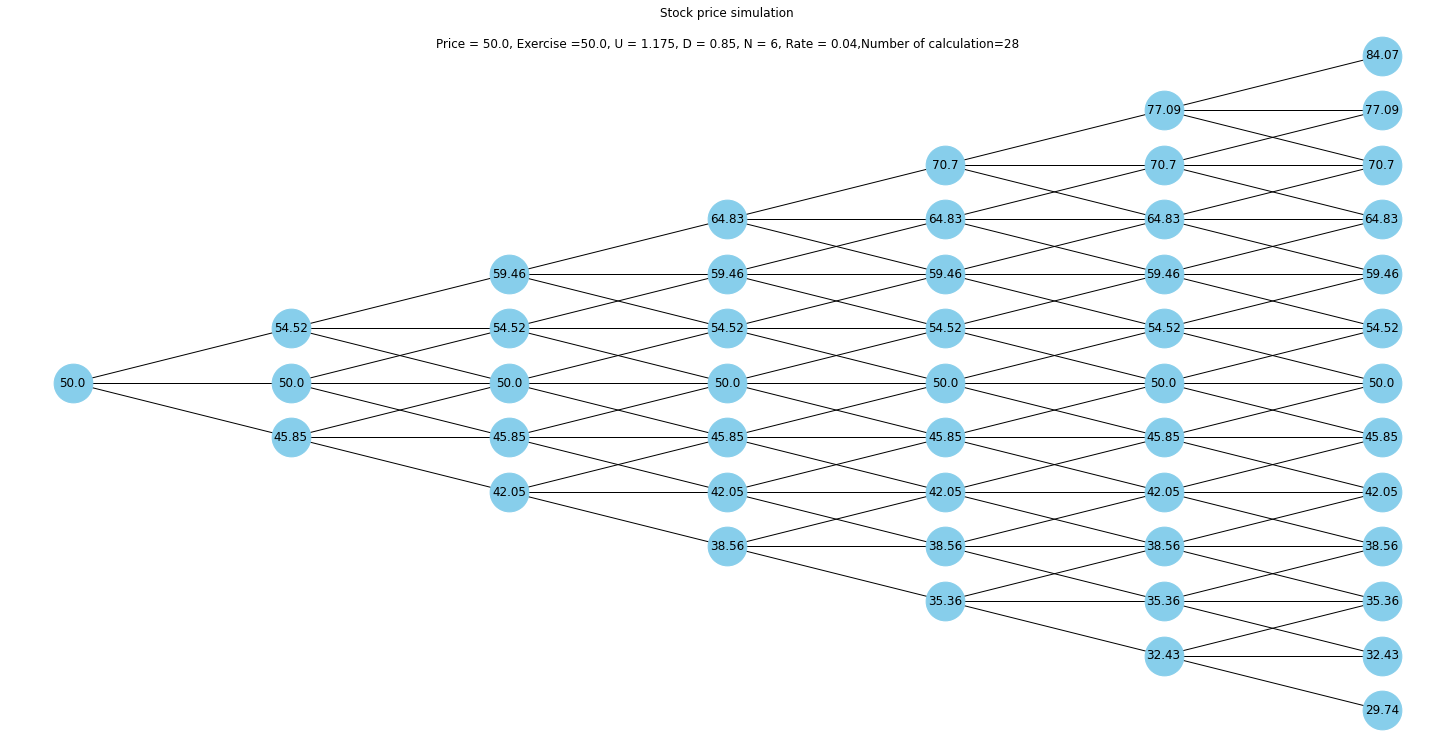

In [43]:
size_of_nodes = 1500
size_of_font = 12

plt.figure(figsize=(20,10))
vals = construct_labels(initial_price,N,T,sigma,lambdA)
labels = construct_nodelabel(vals,N)
nodepos = construct_nodepos(vals)
G = construct_node(vals,N)
nx.set_node_attributes(G, labels, 'label')
nx.draw(G,pos=nodepos,node_color='skyblue',node_size=size_of_nodes,node_shape='o',alpha=1,font_weight="bold",font_color='darkblue',fontsize=size_of_font)
plt.title('Stock price simulation')
plt.suptitle('Price = {}, Exercise ={}, U = {}, D = {}, N = {}, Rate = {},Number of calculation={}'.format(initial_price,K,u,d,N,r,number_of_calculation))
nx.draw_networkx_labels(G, nodepos, labels)
plt.show()

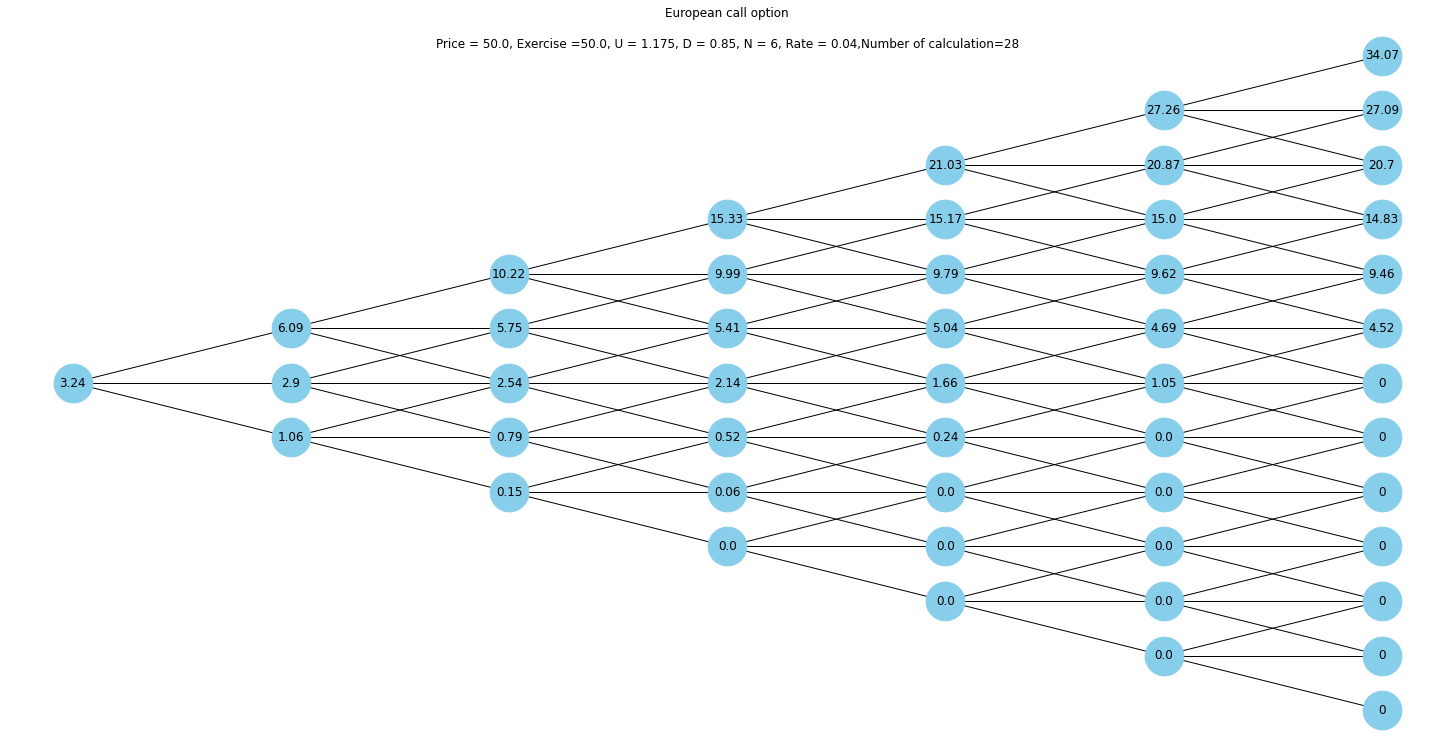

In [44]:
  plt.figure(figsize=(20,10))
  call_vals = construct_Ecallput_node(vals,K,N,r,T,lambdA,sigma,'call')
  labels = construct_nodelabel(call_vals,N)
  nodepos = construct_nodepos(call_vals)
  G = construct_node(call_vals,N)
  nx.set_node_attributes(G, labels, 'label')
  nx.draw(G,pos=nodepos,node_color='skyblue',node_size=size_of_nodes,node_shape='o',alpha=1,font_weight="bold",font_color='darkblue',fontsize=size_of_font)
  plt.title('European call option')
  plt.suptitle('Price = {}, Exercise ={}, U = {}, D = {}, N = {}, Rate = {},Number of calculation={}'.format(initial_price,K,u,d,N,r,number_of_calculation))
  nx.draw_networkx_labels(G, nodepos, labels)
  plt.show()